In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler

In [3]:
import plotly.express as px

In [4]:
df = pd.read_csv('all_data_no_duplicates_equal_size.csv', index_col=0)

In [5]:
df.head()

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std,genre
song_id,,,,,,,,,,,,,,,,,,,,,
17bf8d5f74d4e53a3f918263da27600ba0e555b5,-131.34530,154.44778,-46.625813,55.491830,-2.969374,28.455832,-11.929317,9.539672,4.456010,9.052435,...,1.541892,1.521225,132.512019,1.070878,1.396955,0.741772,1.111939,14.542479,8.524608,blues
80822cc306bcf4d6ce727ed9b185382183590feb,-216.48515,159.88239,-53.843456,41.647510,4.802261,6.194261,-0.619864,1.253317,5.258920,9.118914,...,1.589639,1.765213,117.453835,1.569087,2.719492,0.010281,-0.229946,14.460827,8.436646,blues
fe86aae90064f43dd3c9ccc2271fd3570ea8d530,-97.64007,137.78816,-43.407673,57.867115,-17.740084,48.168274,-20.405445,14.013074,-11.915717,13.601735,...,1.332900,0.778537,123.046875,1.270062,1.725401,0.076682,-0.120848,14.568310,8.531551,blues
8a36fef7cc58e415b09f472062d529ad75f6888a,-218.33733,139.85650,-46.182710,29.928583,-5.652246,26.629574,-6.704617,15.074043,0.800906,0.926584,...,1.527841,1.310864,132.512019,1.251199,1.432018,1.522334,2.031958,14.527072,8.542730,blues
6a90012a2f47eb44abcaf1641683f86425713e40,-137.82199,145.93646,-52.225964,44.550194,-5.257767,24.834461,-7.554444,12.882658,4.022466,11.714938,...,1.525155,1.458287,89.102909,2.108472,5.425519,0.541542,1.362728,14.487932,8.556227,blues


In [6]:
X = df.drop('genre', axis=1)
y = df['genre']

In [7]:
X.head()

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,zcr_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
song_id,,,,,,,,,,,,,,,,,,,,,
17bf8d5f74d4e53a3f918263da27600ba0e555b5,-131.34530,154.44778,-46.625813,55.491830,-2.969374,28.455832,-11.929317,9.539672,4.456010,9.052435,...,0.019586,1.541892,1.521225,132.512019,1.070878,1.396955,0.741772,1.111939,14.542479,8.524608
80822cc306bcf4d6ce727ed9b185382183590feb,-216.48515,159.88239,-53.843456,41.647510,4.802261,6.194261,-0.619864,1.253317,5.258920,9.118914,...,0.022674,1.589639,1.765213,117.453835,1.569087,2.719492,0.010281,-0.229946,14.460827,8.436646
fe86aae90064f43dd3c9ccc2271fd3570ea8d530,-97.64007,137.78816,-43.407673,57.867115,-17.740084,48.168274,-20.405445,14.013074,-11.915717,13.601735,...,0.021188,1.332900,0.778537,123.046875,1.270062,1.725401,0.076682,-0.120848,14.568310,8.531551
8a36fef7cc58e415b09f472062d529ad75f6888a,-218.33733,139.85650,-46.182710,29.928583,-5.652246,26.629574,-6.704617,15.074043,0.800906,0.926584,...,0.025217,1.527841,1.310864,132.512019,1.251199,1.432018,1.522334,2.031958,14.527072,8.542730
6a90012a2f47eb44abcaf1641683f86425713e40,-137.82199,145.93646,-52.225964,44.550194,-5.257767,24.834461,-7.554444,12.882658,4.022466,11.714938,...,0.031764,1.525155,1.458287,89.102909,2.108472,5.425519,0.541542,1.362728,14.487932,8.556227


In [8]:
len(X.columns)

79

<AxesSubplot:>

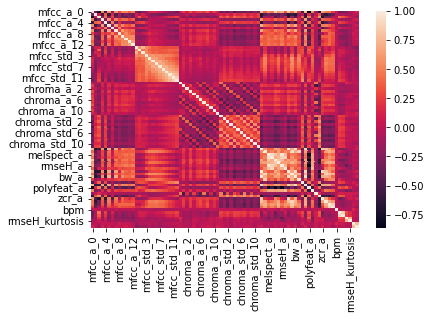

In [9]:
sns.heatmap(X.corr())

## Normalize Data

In [10]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=df.columns[:-1])
X_scaled

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,zcr_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
0,0.874646,0.532899,0.214078,0.631285,0.387107,0.702533,0.305981,0.613106,0.528194,0.648439,...,0.199647,0.460560,0.310274,0.581940,0.100090,0.015170,0.356728,0.065757,0.857820,0.944378
1,0.740554,0.570748,0.177654,0.523680,0.457172,0.416242,0.489118,0.480647,0.544279,0.649624,...,0.236774,0.482978,0.375112,0.444170,0.152273,0.023305,0.235739,0.033992,0.845394,0.918752
2,0.927730,0.416873,0.230318,0.649747,0.253944,0.956041,0.168725,0.684615,0.200219,0.729495,...,0.218909,0.362437,0.112909,0.495342,0.120953,0.017190,0.246722,0.036574,0.861751,0.946401
3,0.737637,0.431278,0.216314,0.432594,0.362920,0.679046,0.390586,0.701575,0.454972,0.503659,...,0.267344,0.453963,0.254372,0.581940,0.118977,0.015386,0.485834,0.087535,0.855475,0.949658
4,0.864445,0.473622,0.185817,0.546241,0.366477,0.655961,0.376824,0.666545,0.519509,0.695878,...,0.346030,0.452702,0.293548,0.184783,0.208769,0.039950,0.323610,0.071693,0.849519,0.953590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,0.861912,0.494177,0.208269,0.735770,0.478349,0.699453,0.372335,0.657522,0.524116,0.593581,...,0.203148,0.402195,0.271163,0.894811,0.160090,0.023649,0.223424,0.057759,0.887654,0.926863
876,0.778093,0.349008,0.273657,0.605994,0.226026,0.782237,0.224700,0.823031,0.246317,0.644058,...,0.386122,0.448246,0.233616,0.184783,0.098493,0.016469,0.373633,0.073756,0.864376,0.972400
877,0.778928,0.603184,0.304174,0.657401,0.347294,0.674659,0.652182,0.514252,0.671266,0.502243,...,0.242430,0.472180,0.245116,0.397448,0.125568,0.020080,0.257618,0.021600,0.835809,0.928954
878,0.899692,0.438894,0.181773,0.548089,0.309757,0.865484,0.160127,0.686408,0.320578,0.620056,...,0.346482,0.417452,0.291575,0.551630,0.144724,0.024610,0.248764,0.083848,0.832892,0.918954


In [11]:
y

song_id
17bf8d5f74d4e53a3f918263da27600ba0e555b5    blues
80822cc306bcf4d6ce727ed9b185382183590feb    blues
fe86aae90064f43dd3c9ccc2271fd3570ea8d530    blues
8a36fef7cc58e415b09f472062d529ad75f6888a    blues
6a90012a2f47eb44abcaf1641683f86425713e40    blues
                                            ...  
513fb471097b3e1c3033be20b1db1661968855d4     rock
34a3c62e16816ffd3278fdd5d3a38cbcb48c0fab     rock
f50f3416ea0807503e172ba87a92d8047d4f95da     rock
3b01294b6b0458fea6ed5a88ea1b1593eb495ead     rock
4855a9886049a72e770dab27968febd7928a7051     rock
Name: genre, Length: 880, dtype: object

## PCA - Dimension Reduction

In [12]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20'])

<BarContainer object of 20 artists>

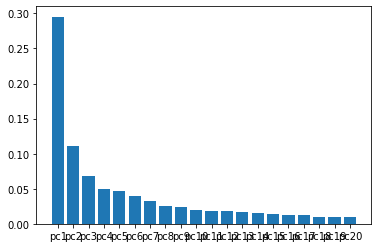

In [13]:
plt.bar(principalDf.columns, pca.explained_variance_ratio_)

In [14]:
sum(pca.explained_variance_ratio_[0:12])

0.7487975405186099

The first 12 PCs account for 75% of the variance. 

In [15]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12'])

In [16]:
principalDf['genre'] = df['genre'].values
principalDf.index = df.index
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,genre
song_id,,,,,,,,,,,,,
17bf8d5f74d4e53a3f918263da27600ba0e555b5,-0.350014,-0.693698,-0.253751,0.488860,0.054901,-0.059542,-0.147633,0.224806,0.284645,0.061592,0.245756,0.114835,blues
80822cc306bcf4d6ce727ed9b185382183590feb,0.400811,-0.023837,0.056244,-0.168643,0.107622,-0.286768,0.146523,0.271219,-0.184119,-0.227420,0.392197,0.122729,blues
fe86aae90064f43dd3c9ccc2271fd3570ea8d530,-0.403038,-0.765621,0.025200,0.410214,-0.285064,-0.501865,0.015695,-0.133637,0.135879,0.076950,-0.066186,-0.015963,blues
8a36fef7cc58e415b09f472062d529ad75f6888a,0.276223,-0.261314,0.386541,-0.187112,0.035258,-0.235896,0.088182,0.116154,0.129865,-0.034286,0.073200,0.092677,blues
6a90012a2f47eb44abcaf1641683f86425713e40,-0.346649,-0.299363,0.055735,-0.213523,0.154896,-0.288098,0.000960,0.221684,-0.056532,-0.132810,-0.094871,0.218545,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513fb471097b3e1c3033be20b1db1661968855d4,0.056174,-0.630642,-0.304136,-0.168227,-0.289075,-0.236012,0.133287,0.272132,0.140667,0.007850,0.081029,0.245322,rock
34a3c62e16816ffd3278fdd5d3a38cbcb48c0fab,-0.108228,-0.658440,0.636813,-0.064072,-0.296367,0.092518,0.278780,0.000338,0.096623,-0.021225,0.018195,-0.093079,rock
f50f3416ea0807503e172ba87a92d8047d4f95da,-0.003687,-0.506736,-0.026819,0.007432,0.478130,-0.087778,0.152391,0.059156,0.219175,-0.300400,-0.074865,-0.307299,rock


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

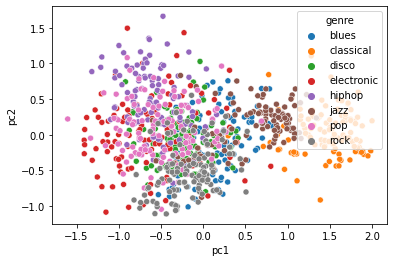

In [17]:
# 2 dimensions
sns.scatterplot(data=principalDf, x='pc1', y='pc2', hue='genre')

In [18]:
# 3 dimensions
fig = px.scatter_3d(principalDf, x='pc1', y='pc2', z='pc3', color='genre')
fig.write_html("pca_scatter3d.html")
# view the plot in safari

## Add Encoded Label

In [19]:
le = LabelEncoder()
principalDf['multiclass_label'] = le.fit_transform(principalDf['genre'])

In [20]:
encoded_classes = {}
for i, idx in zip(range(len(le.classes_)), list(le.classes_)):
    encoded_classes[idx] = i    
encoded_classes

{'blues': 0,
 'classical': 1,
 'disco': 2,
 'electronic': 3,
 'hiphop': 4,
 'jazz': 5,
 'pop': 6,
 'rock': 7}

In [21]:
principalDf.groupby('genre')['multiclass_label'].value_counts()

genre       multiclass_label
blues       0                   110
classical   1                   110
disco       2                   110
electronic  3                   110
hiphop      4                   110
jazz        5                   110
pop         6                   110
rock        7                   110
Name: multiclass_label, dtype: int64

In [22]:
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,genre,multiclass_label
song_id,,,,,,,,,,,,,,
17bf8d5f74d4e53a3f918263da27600ba0e555b5,-0.350014,-0.693698,-0.253751,0.488860,0.054901,-0.059542,-0.147633,0.224806,0.284645,0.061592,0.245756,0.114835,blues,0
80822cc306bcf4d6ce727ed9b185382183590feb,0.400811,-0.023837,0.056244,-0.168643,0.107622,-0.286768,0.146523,0.271219,-0.184119,-0.227420,0.392197,0.122729,blues,0
fe86aae90064f43dd3c9ccc2271fd3570ea8d530,-0.403038,-0.765621,0.025200,0.410214,-0.285064,-0.501865,0.015695,-0.133637,0.135879,0.076950,-0.066186,-0.015963,blues,0
8a36fef7cc58e415b09f472062d529ad75f6888a,0.276223,-0.261314,0.386541,-0.187112,0.035258,-0.235896,0.088182,0.116154,0.129865,-0.034286,0.073200,0.092677,blues,0
6a90012a2f47eb44abcaf1641683f86425713e40,-0.346649,-0.299363,0.055735,-0.213523,0.154896,-0.288098,0.000960,0.221684,-0.056532,-0.132810,-0.094871,0.218545,blues,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513fb471097b3e1c3033be20b1db1661968855d4,0.056174,-0.630642,-0.304136,-0.168227,-0.289075,-0.236012,0.133287,0.272132,0.140667,0.007850,0.081029,0.245322,rock,7
34a3c62e16816ffd3278fdd5d3a38cbcb48c0fab,-0.108228,-0.658440,0.636813,-0.064072,-0.296367,0.092518,0.278780,0.000338,0.096623,-0.021225,0.018195,-0.093079,rock,7
f50f3416ea0807503e172ba87a92d8047d4f95da,-0.003687,-0.506736,-0.026819,0.007432,0.478130,-0.087778,0.152391,0.059156,0.219175,-0.300400,-0.074865,-0.307299,rock,7


## Train Test Split

In [23]:
X = principalDf.drop(['genre', 'multiclass_label'], axis=1)
y = principalDf['multiclass_label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=0)

## SVM

In [25]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']} 
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.610 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.449 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.551 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.475 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.458 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.547 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.492 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [26]:
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [27]:
grid_svm_preds = grid_svm.predict(X_test)
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(grid_svm_preds)))

              precision    recall  f1-score   support

       blues       0.43      0.49      0.46        37
   classical       0.97      0.97      0.97        36
       disco       0.63      0.72      0.68        36
  electronic       0.69      0.56      0.62        36
      hiphop       0.66      0.51      0.58        37
        jazz       0.76      0.76      0.76        37
         pop       0.45      0.50      0.47        36
        rock       0.70      0.72      0.71        36

    accuracy                           0.65       291
   macro avg       0.66      0.65      0.65       291
weighted avg       0.66      0.65      0.65       291



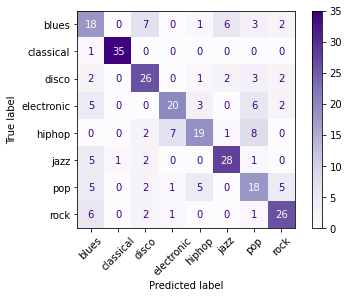

In [28]:
class_names = le.classes_

cnf_matrix = confusion_matrix(y_test, grid_svm_preds)
plot_confusion_matrix(grid_svm, X_test, y_test, xticks_rotation=45,
                                 display_labels=class_names,
                                 cmap=plt.cm.Purples)

## PCA - Dimension Reduction - first 20

In [29]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20'])

In [30]:
sum(pca.explained_variance_ratio_[0:20])

0.8486901716433574

Account for 85% of variance

In [31]:
principalDf['genre'] = df['genre'].values
principalDf.index = df.index
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,genre
song_id,,,,,,,,,,,,,,,,,,,,,
17bf8d5f74d4e53a3f918263da27600ba0e555b5,-0.350014,-0.693698,-0.253774,0.488825,0.054851,-0.059488,-0.147501,0.223398,0.283437,0.057838,...,0.116532,-0.009989,0.066088,0.010839,-0.040217,-0.119666,0.075326,0.037054,0.067261,blues
80822cc306bcf4d6ce727ed9b185382183590feb,0.400811,-0.023837,0.056218,-0.168670,0.107550,-0.286798,0.146643,0.270002,-0.185562,-0.230271,...,0.121658,-0.170756,-0.101427,-0.040556,0.032131,0.051417,-0.088028,0.017115,-0.123787,blues
fe86aae90064f43dd3c9ccc2271fd3570ea8d530,-0.403038,-0.765620,0.025302,0.410234,-0.284910,-0.502000,0.015273,-0.127875,0.139331,0.087968,...,-0.013973,0.022419,-0.014798,-0.069015,-0.086407,0.065019,0.180565,-0.071887,0.223640,blues
8a36fef7cc58e415b09f472062d529ad75f6888a,0.276223,-0.261312,0.386543,-0.187082,0.035258,-0.235919,0.087885,0.116732,0.129990,-0.035351,...,0.092007,0.121069,0.021713,-0.067838,0.030552,0.060254,-0.173998,0.129700,0.044870,blues
6a90012a2f47eb44abcaf1641683f86425713e40,-0.346649,-0.299364,0.055749,-0.213513,0.154916,-0.288117,0.001043,0.222482,-0.056432,-0.132114,...,0.218407,-0.037266,-0.124536,0.171611,-0.138884,0.219973,0.079526,-0.040703,-0.007654,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513fb471097b3e1c3033be20b1db1661968855d4,0.056174,-0.630640,-0.304103,-0.168167,-0.289038,-0.235998,0.132774,0.273779,0.142113,0.010344,...,0.247370,0.107135,0.060578,-0.385280,0.198437,-0.003887,-0.125844,-0.034152,-0.005776,rock
34a3c62e16816ffd3278fdd5d3a38cbcb48c0fab,-0.108228,-0.658439,0.636834,-0.064063,-0.296325,0.092528,0.278603,0.001215,0.097276,-0.020388,...,-0.091904,0.086814,-0.221051,0.205856,0.079679,0.149463,0.241206,0.096727,-0.049303,rock
f50f3416ea0807503e172ba87a92d8047d4f95da,-0.003687,-0.506735,-0.026788,0.007473,0.478260,-0.087872,0.151789,0.062220,0.221242,-0.292203,...,-0.309136,-0.196372,0.122295,0.044975,-0.122632,0.035548,-0.162692,-0.080938,0.138565,rock


In [32]:
le = LabelEncoder()
principalDf['multiclass_label'] = le.fit_transform(principalDf['genre'])

In [33]:
encoded_classes = {}
for i, idx in zip(range(len(le.classes_)), list(le.classes_)):
    encoded_classes[idx] = i    
encoded_classes

{'blues': 0,
 'classical': 1,
 'disco': 2,
 'electronic': 3,
 'hiphop': 4,
 'jazz': 5,
 'pop': 6,
 'rock': 7}

In [34]:
X = principalDf.drop(['genre', 'multiclass_label'], axis=1)
y = principalDf['multiclass_label']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=0)

In [36]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']} 
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.466 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.568 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.475 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.564 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.525 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [37]:
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [38]:
grid_svm_preds = grid_svm.predict(X_test)
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(grid_svm_preds)))

              precision    recall  f1-score   support

       blues       0.50      0.57      0.53        37
   classical       0.97      1.00      0.99        36
       disco       0.63      0.81      0.71        36
  electronic       0.52      0.42      0.46        36
      hiphop       0.71      0.65      0.68        37
        jazz       0.93      0.73      0.82        37
         pop       0.48      0.44      0.46        36
        rock       0.71      0.81      0.75        36

    accuracy                           0.68       291
   macro avg       0.68      0.68      0.67       291
weighted avg       0.68      0.68      0.67       291



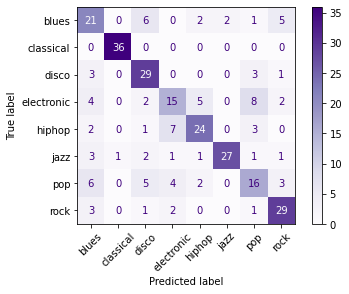

In [39]:
class_names = le.classes_

cnf_matrix = confusion_matrix(y_test, grid_svm_preds)
plot_confusion_matrix(grid_svm, X_test, y_test, xticks_rotation=45,
                                 display_labels=class_names,
                                 cmap=plt.cm.Purples)

Increased number of PCs and precision + recall improved. 